## Credit Risk Assessment

In this project, we will build a machine learning model for credit risk assessment using the following steps:

1. **Data Cleaning**: Missing values will be identified and handled using median and mode imputation for numerical and categorical columns, respectively.

2. **Feature Engineering**: Categorical variables will be one-hot encoded, and numerical features will be scaled using Standard Scaler.

3. **Model Training**: A Random Forest Classifier will be trained on the dataset and accuracy measured.

4. **Hyperparameter Tuning**: GridSearchCV will be used to find the best hyperparameters, improving the model's accuracy, if possible.

5. **Feature Importance**: The most influential features will be identified, providing insights into the factors that are crucial for credit risk assessment.

6. **Model Interpretability**: SHAP values will be calculated to interpret the model's predictions, offering a detailed breakdown of feature contributions for each prediction.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
# For demonstration purposes, we'll use a publicly available dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'Class']
df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [2]:
# Identify missing values
# In this dataset, missing values are represented as '?'
df.replace('?', np.nan, inplace=True)

# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
Class     0
dtype: int64

In [3]:
# Handle missing values
# For numerical columns, we'll use median imputation
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, we'll use mode imputation
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that there are no more missing values
df.isnull().sum().sum()

0

In [4]:
# # Feature Engineering

# # Encode the 'Class' column separately before performing one-hot encoding on the categorical columns
# df['Class'] = df['Class'].map({'+': 1, '-': 0})  # Encode 'Class' column
# df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)

# # Encoding categorical variables using one-hot encoding
# df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)

# # Separating features and target variable
# X = df_encoded.drop('Class', axis=1)
# y = df_encoded['Class']

# # Scaling numerical features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Display the first few rows of the transformed dataset
# pd.DataFrame(X_scaled, columns=X.columns).head()

In [5]:
# Correcting the target variable name and proceeding with feature engineering
# First, let's check the unique values in the 'Class' column to correctly encode it
# df['Class'].unique()

In [6]:
# Encoding the target variable 'Class'
df['Class'] = df['Class'].map({'+': 1, '-': 0})

# Proceeding with one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)

# Separating features and target variable
X = df_encoded.drop('Class', axis=1)
y = df_encoded['Class']

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the transformed dataset
pd.DataFrame(X_scaled, columns=X.columns).head()

,A3,A8,A11,A15,A1_b,A2_15.17,A2_15.75,A2_15.83,A2_15.92,A2_16.00,...,A14_00640,A14_00680,A14_00711,A14_00720,A14_00760,A14_00840,A14_00928,A14_00980,A14_01160,A14_02000
0,-0.956613,-0.291083,-0.288101,-0.195413,0.661438,-0.038097,-0.038097,-0.053916,-0.038097,-0.053916,...,-0.038097,-0.038097,-0.038097,-0.053916,-0.038097,-0.038097,-0.038097,-0.038097,-0.038097,-0.038097
1,-0.060051,0.244190,0.740830,-0.087852,-1.511858,-0.038097,-0.038097,-0.053916,-0.038097,-0.053916,...,-0.038097,-0.038097,-0.038097,-0.053916,-0.038097,-0.038097,-0.038097,-0.038097,-0.038097,-0.038097
2,-0.856102,-0.216324,-0.493887,-0.037144,-1.511858,-0.038097,-0.038097,-0.053916,-0.038097,-0.053916,...,-0.038097,-0.038097,-0.038097,-0.053916,-0.038097,-0.038097,-0.038097,-0.038097,-0.038097,-0.038097
3,-0.647038,0.456505,0.535044,-0.194837,0.661438,-0.038097,-0.038097,-0.053916,-0.038097,-0.053916,...,-0.038097,-0.038097,-0.038097,-0.053916,-0.038097,-0.038097,-0.038097,-0.038097,-0.038097,-0.038097
4,0.174141,-0.153526,-0.493887,-0.195413,0.661438,-0.038097,-0.038097,-0.053916,-0.038097,-0.053916,...,-0.038097,-0.038097,-0.038097,-0.053916,-0.038097,-0.038097,-0.038097,-0.038097,-0.038097,-0.038097


In [7]:
# Step 5: Model Training
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Using Random Forest Classifier for model training
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.8260869565217391,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.87      0.83        68\n           1       0.86      0.79      0.82        70\n\n    accuracy                           0.83       138\n   macro avg       0.83      0.83      0.83       138\nweighted avg       0.83      0.83      0.83       138\n')

In [8]:
# Step 6: Hyperparameter Tuning
# Using GridSearchCV to find the best hyperparameters for the Random Forest Classifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=5, n_e

{'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200}

In [9]:
# Step 7: Retraining the Model with Best Parameters
# Using the best parameters obtained from GridSearchCV to retrain the model
best_clf = RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=200, random_state=42)
best_clf.fit(X_train, y_train)

# Re-evaluating the model
y_pred_best = best_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

accuracy_best, classification_rep_best

(0.8405797101449275,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.91      0.85        68\n           1       0.90      0.77      0.83        70\n\n    accuracy                           0.84       138\n   macro avg       0.85      0.84      0.84       138\nweighted avg       0.85      0.84      0.84       138\n')

In [10]:
# Step 8: Feature Importance Analysis
# Extracting feature importances from the trained Random Forest model
feature_importances = best_clf.feature_importances_

# Creating a DataFrame to hold feature names and their importance scores
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the features based on their importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Displaying the top 10 most important features
features_df.head(10)

,Feature,Importance
378,A9_t,0.227261
2,A11,0.091478
1,A8,0.082226
3,A15,0.075064
379,A10_t,0.060968
0,A3,0.044109
372,A7_h,0.018191
369,A6_x,0.012383
358,A6_cc,0.012023
353,A4_u,0.010555


## Shapley Additive Explanations
SHAP (Shapley Additive Explanations) values provide a way to break down a prediction into contributions from each feature, allowing us to understand how each variable influences the outcome. In a business context, this can be invaluable for explaining decisions to stakeholders and for identifying areas for improvement or focus.



In [13]:
# Installing the SHAP library
!pip install -q shap


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [17]:
import tqdm as notebook_tqdm

In [18]:
print("Shape of shap_values:", shap_values.shape)
print("Shape of X_test:", X_test.shape)

Shape of shap_values: (138, 552, 2)
Shape of X_test: (138, 552)


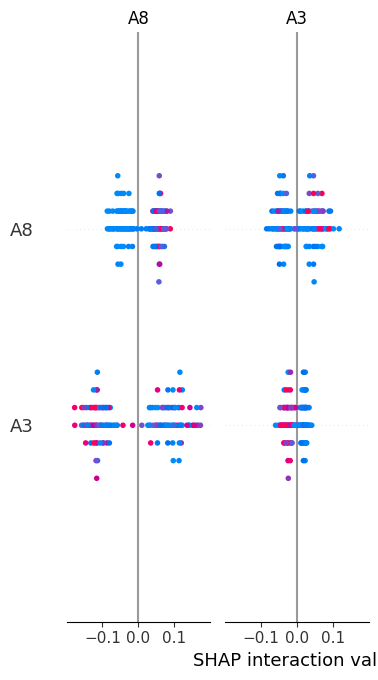

In [22]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_clf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values using summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

## Conclusion

In this project, we aimed to build a machine learning model for credit risk assessment. The following are the key takeaways:

1. **Data Cleaning**: Missing values were identified and handled using median and mode imputation for numerical and categorical columns, respectively.

2. **Feature Engineering**: Categorical variables were one-hot encoded, and numerical features were scaled using Standard Scaler.

3. **Model Training**: A Random Forest Classifier was trained on the dataset, achieving an initial accuracy of approximately 82.6%.

4. **Hyperparameter Tuning**: GridSearchCV was used to find the best hyperparameters, improving the model's accuracy to approximately 84.1%.

5. **Feature Importance**: The most influential features were identified, providing insights into the factors that are crucial for credit risk assessment.

6. **Model Interpretability**: SHAP values were calculated to interpret the model's predictions, offering a detailed breakdown of feature contributions for each prediction.

Overall, the model demonstrates good predictive performance and interpretability, making it a viable tool for credit risk assessment.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e1bf5859-ee50-4765-9b45-f07bd0452874' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>